# PART 3 - Machine Learning Algorithm Implication
---

### Import libraries
---

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mp
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn import tree
import sklearn
from plot_metric.functions import BinaryClassification

In [2]:
# !pip install --upgrade sklearn
# !pip install -U scikit-learn
# !pip install --upgrade sklearn
# !pip install scikit-learn
# !pip install missingno
# !pip install plot-metric

### Load the data
---

In [7]:
dataset_address = '../dataset/'
data_name = 'Part_2_end.csv'
path = dataset_address + data_name
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Unnamed: 0.1,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,0,0,109,13,1.412538,0.000000,0,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,1,1,94,7,1.674388,1.681124,0,1.311019,22,1.359356,1.681124,1.988267,1.505470
2,2,2,94,7,1.708680,1.432721,0,1.116123,22,1.432721,1.432721,2.042745,1.463212
3,3,3,91,11,1.530906,1.000000,0,1.000000,22,1.000000,1.000000,1.764404,1.404450
4,4,4,56,7,1.638709,1.611444,0,1.302005,22,1.611444,1.611444,1.931979,1.494654


### Seperate Y from Xs.
Seperate the feather columns from object column ('state') in this project.

In [8]:
state = data['state']

In [9]:
data.drop(labels = ["state"], axis = 1, inplace = True)
data.head()

,Unnamed: 0,Unnamed: 0.1,category,main_category,goal,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,0,0,109,13,1.412538,0.000000,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,1,1,94,7,1.674388,1.681124,1.311019,22,1.359356,1.681124,1.988267,1.505470
2,2,2,94,7,1.708680,1.432721,1.116123,22,1.432721,1.432721,2.042745,1.463212
3,3,3,91,11,1.530906,1.000000,1.000000,22,1.000000,1.000000,1.764404,1.404450
4,4,4,56,7,1.638709,1.611444,1.302005,22,1.611444,1.611444,1.931979,1.494654


### Spliting data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, state, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(299891, 12) (299891,)
(74973, 12) (74973,)


### Fitting ML algorithms

Let's try several classification models (ML) to see which one gives the best accuracy for its predictions.

### Validation Data Set

In [11]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

Evaluate the model performance using make_scorere and accuracy_score function from sklearn metrics.

# KNeighbors Model

In [12]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)
print('acc_knn = \n', acc_knn)

acc_knn = 
 0.5711332299638207


Depend on the project you may try to optimize the models to reduce **FP** or **FN**.

To zoom on Fraudulent transaction recognization, optimize the sensitivity, or To get email spam to optimize your model to achieve the high precision or specificity. and so on...

For two-class classification projects like this one, we can focus on accuracy. 

Note that we need to have almost a balanced output (number of 0 and 1).

Other important criterion which commonly is used, is the **Area under the curve** or **AUC**.

For regression problems, on the other hand-side, we need to focus on several parameters including **R-square**, **standard deviation**, and root means square error (**RMSE**). By comparing these three parameters, one can achieve a correct idea about the model strength.

In [13]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_valid, pred_knn)
print('confusion_matrix = \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

confusion_matrix = 
 [[28576 10032]
 [15691  5680]]


### Accuracy 

In [14]:
#how often is the classifier correct?
# use float to perform true division, not integer division
print('(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))
print('\naccuracy_score = \n', metrics.accuracy_score(y_valid, pred_knn))

(TP + TN) / float(TP + TN + FP + FN) = 
 0.5711332299638207

accuracy_score = 
 0.5711332299638207


### Precision

In [15]:
# Precision: When a positive value is predicted, how often is the prediction correct? Precision = TP/TP+FP
precision = TP / float(TP + FP)
print('precision = \n', precision)
print('\n(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))

precision = 
 0.3615071283095723

(TP + TN) / float(TP + TN + FP + FN) = 
 0.5711332299638207


### Sensitivity or Recall

In [16]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?
sensitivity = TP / float(FN + TP)
print('sensitivity = \n', sensitivity)
print('\n(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))

sensitivity = 
 0.26578073089701

(TP + TN) / float(TP + TN + FP + FN) = 
 0.5711332299638207


### F1 score

This score takes both false positives and false negatives into account.

In [17]:
# F1 Score = 2*(sensitivity * Precision) / (sensitivity + Precision)
F1_Score = 2*(sensitivity * precision) / (sensitivity + precision)
print('F1_Score = \n', F1_Score)
print('\n(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))

F1_Score = 
 0.30633983226815525

(TP + TN) / float(TP + TN + FP + FN) = 
 0.5711332299638207


In [18]:
# Specificity: When the actual value is negative, how often is the prediction correct?
specificity = TN / (TN + FP)
print('specificity = \n', specificity)
print('\n(TP + TN) / float(TP + TN + FP + FN) \n', (TP + TN) / float(TP + TN + FP + FN))

specificity = 
 0.7401574803149606

(TP + TN) / float(TP + TN + FP + FN) 
 0.5711332299638207


In [19]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print('false_positive_rate = \n', false_positive_rate)
# and false negative rate
print('\n1 - specificity = \n', 1 - specificity)

false_positive_rate = 
 0.25984251968503935

1 - specificity = 
 0.25984251968503935


# RandomForest Model

In [20]:
rf_clf = RandomForestClassifier(n_estimators=50, n_jobs=-1) # increase the number of trees to get better results
rf_model=rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)
print('acc_rf = \n', acc_rf)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_knn))

acc_rf = 
 0.9950315943913703

confusion_matrix = 
 [[28576 10032]
 [15691  5680]]


Check out what feathers are important determined by the model.

In [21]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.21172936545850204, 'usd_pledged_real'),
 (0.20935504591908805, 'pledged'),
 (0.1973741302540741, 'backers'),
 (0.1420037642164996, 'usd_goal_real'),
 (0.13596026257208021, 'goal'),
 (0.08108322758291969, 'usd pledged'),
 (0.007904108615902837, 'NumOfDays'),
 (0.003643271082846252, 'main_category'),
 (0.0030146714393091247, 'Unnamed: 0'),
 (0.0029619437861347795, 'Unnamed: 0.1')]

### ROC for RandomForest Model

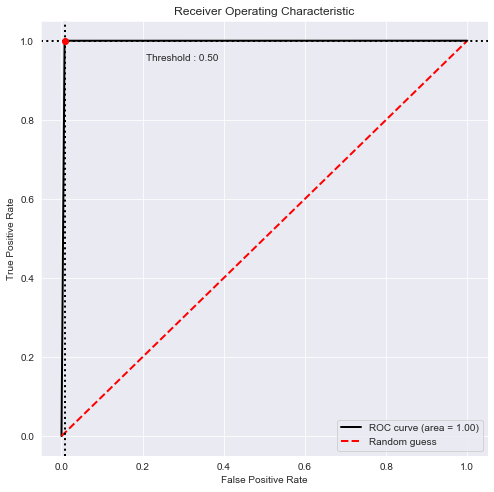

In [22]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_rf, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# LogisiticRegression Model

In [23]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)
print('acc_logreg = \n', acc_logreg)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_logreg))

acc_logreg = 
 0.6436919588522649

confusion_matrix = 
 [[38608     0]
 [21371     0]]


### ROC for LogisiticRegression Model

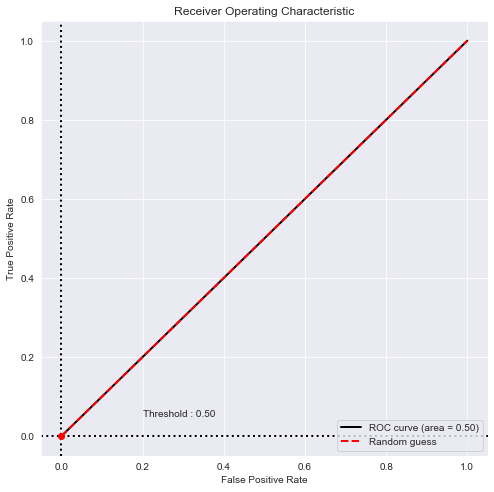

In [24]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_logreg, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# DecisionTree Model

In [25]:
dt_clf = DecisionTreeClassifier(max_depth = 3)
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)
print('acc_dt = \n', acc_dt)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_dt))

acc_dt = 
 0.9186381900331783

confusion_matrix = 
 [[34802  3806]
 [ 1074 20297]]


### ROC for DecisionTree Model

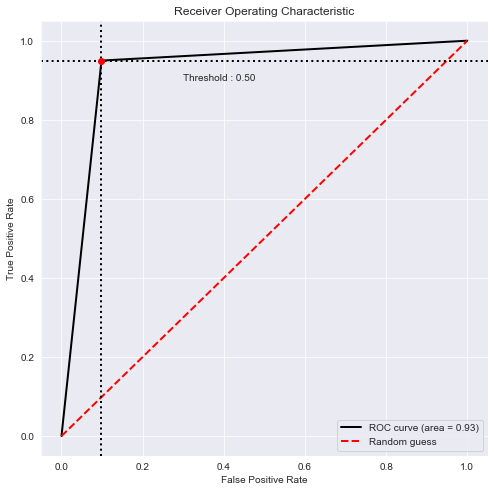

In [26]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_dt, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

In [27]:
feature_names = np.array(list(data.columns))
target_names = np.array(['unsuccess', 'success'])

### Lets check out a visualization

Check out the text representation of your tree here.

In [28]:
text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_6 <= 1.33
|   |--- feature_10 <= 1.56
|   |   |--- feature_9 <= 1.42
|   |   |   |--- class: 0
|   |   |--- feature_9 >  1.42
|   |   |   |--- class: 1
|   |--- feature_10 >  1.56
|   |   |--- feature_9 <= 1.58
|   |   |   |--- class: 0
|   |   |--- feature_9 >  1.58
|   |   |   |--- class: 0
|--- feature_6 >  1.33
|   |--- feature_10 <= 1.82
|   |   |--- feature_9 <= 1.66
|   |   |   |--- class: 1
|   |   |--- feature_9 >  1.66
|   |   |   |--- class: 1
|   |--- feature_10 >  1.82
|   |   |--- feature_9 <= 1.83
|   |   |   |--- class: 0
|   |   |--- feature_9 >  1.83
|   |   |   |--- class: 1



And check out the tree figure below.

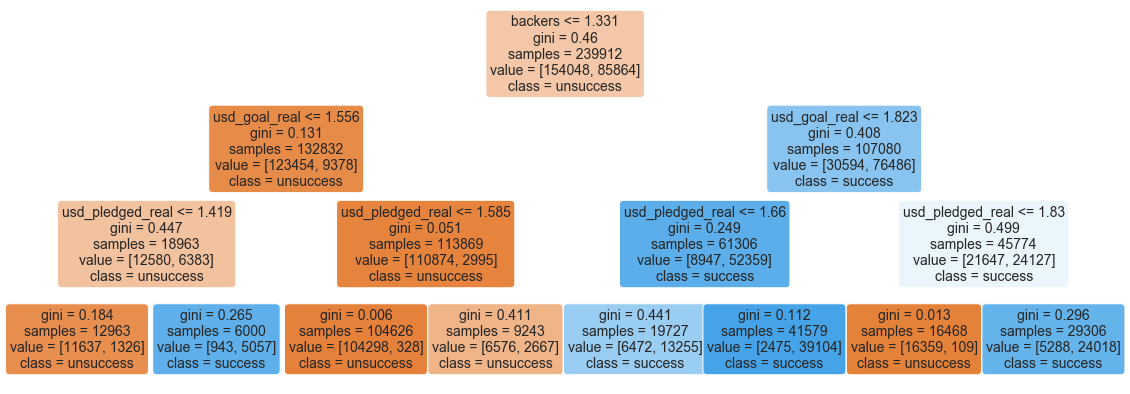

In [29]:
plt.figure(figsize=(20,7))
a = tree.plot_tree(dt_clf, 
              feature_names=feature_names, 
              class_names=target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

Let's use the default max-depth number

In [30]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)
print('acc_dt = \n', acc_dt)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_dt))

acc_dt = 
 0.9907467613664782

confusion_matrix = 
 [[38333   275]
 [  280 21091]]


# GaussianNB Model

In [31]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)
print('acc_gnb = \n', acc_gnb)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_gnb))

acc_gnb = 
 0.6436919588522649

confusion_matrix = 
 [[38608     0]
 [21371     0]]


### ROC for GaussianNB Model

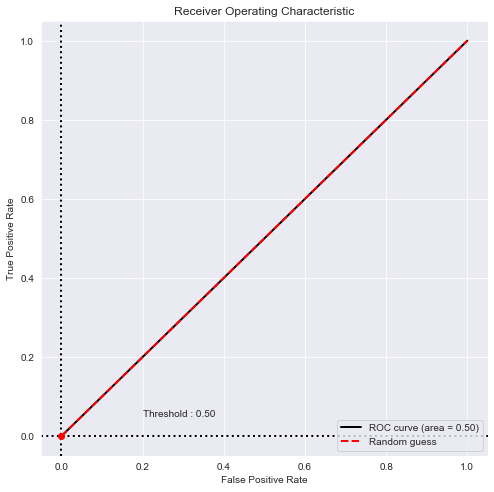

In [32]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_gnb, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Linear SVC Model

In [33]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)
print('acc_linsvc = \n', acc_linsvc)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_linsvc))

acc_linsvc = 
 0.5572283632604745

confusion_matrix = 
 [[12153 26455]
 [  102 21269]]


c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### ROC for Linear SVC Model

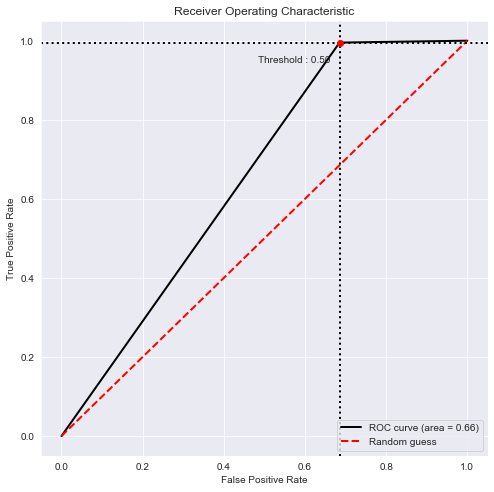

In [34]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_linsvc, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Evaluating Models Performances

In [35]:
model_performance = pd.DataFrame({
    "Model": ["Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Random Forest,0.995032
5,Decision Tree,0.990747
2,Logistic Regression,0.643692
4,Gaussian Naive Bayes,0.643692
3,K Nearest Neighbors,0.571133
0,Linear SVC,0.557228


It is seen that the Random Forest is the best model.

Apply the Random Forest to test data to see how much it works

In [36]:
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print('acc_rf = \n', acc_rf)

acc_rf = 
 0.994878156136209


### Recommendations

* Note that we did not check out the number of 1 to the number of 0. The ratio in this project is 35(1) to 65(0). This can results model to achieve bias toward 0 predictions. In the case of low accuracy results, we can use the oversampling technique and follow the same steps above.
* The confusion matrix shows good results therefore we don't need to consider oversampling procedure.
```
confusion_matrix = 
 [[38207   299]
 [  322 21151]]
```
* The ML algorithms results are promising with an average accuracy of 0.93.
* The same project can be solved as a multi-classification (5 separate output).
* No ML algorithm hyperparameter tuning done. In case of not having a good results, the hyper-paramter optimization is suggested.
